In [11]:
import os
import librosa
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
import IPython.display as ipd
get_ipython().run_line_magic('matplotlib', 'inline')

In [12]:
!pip install tensorflow_io

In [13]:
speech_dir=os.getcwd()+'/Speech/'
music_dir=os.getcwd()+'/music/'

In [14]:
os.listdir('speech')

['speech-us-gov-0109.wav',
 'speech-us-gov-0250.wav',
 'speech-us-gov-0201.wav',
 'speech-us-gov-0082.wav',
 'speech-us-gov-0229.wav',
 'speech-us-gov-0067.wav',
 'speech-us-gov-0210.wav',
 'speech-us-gov-0130.wav',
 'speech-us-gov-0147.wav',
 'speech-us-gov-0005.wav',
 'speech-us-gov-0252.wav',
 'speech-us-gov-0159.wav']

In [15]:
speech_dir='/content/speech/'
music_dir='/content/music/'

In [16]:
y,sr = librosa.load(os.path.join(speech_dir+ 'speech-us-gov-0005.wav'))

In [ ]:
ipd.Audio(os.path.join(speech_dir+ 'speech-us-gov-0005.wav'))

In [17]:
y2,sr = librosa.load(os.path.join(music_dir+ 'music-fma-wa-0000.wav'))

In [18]:
ipd.Audio(os.path.join(music_dir+ 'music-fma-wa-0000.wav'))

In [19]:
#Applying STFT
hop_length=128
x=librosa.stft(y)
x_in_db=librosa.amplitude_to_db(abs(x))

In [20]:
#Verification for signal in DB
x_in_db

array([[-33.364277 , -30.936087 , -18.487625 , ...,  -6.5921474,
         -7.0271673, -33.364277 ],
       [-33.364277 , -32.63692  , -19.029425 , ...,  -3.028959 ,
         -6.9767737, -32.620434 ],
       [-33.364277 , -33.364277 , -18.450836 , ...,  -0.6009774,
         -7.354699 , -31.309715 ],
       ...,
       [-33.364277 , -33.364277 , -33.364277 , ..., -33.364277 ,
        -33.364277 , -33.364277 ],
       [-33.364277 , -33.364277 , -33.364277 , ..., -33.364277 ,
        -33.364277 , -33.364277 ],
       [-33.364277 , -33.364277 , -33.364277 , ..., -33.364277 ,
        -33.364277 , -33.364277 ]], dtype=float32)

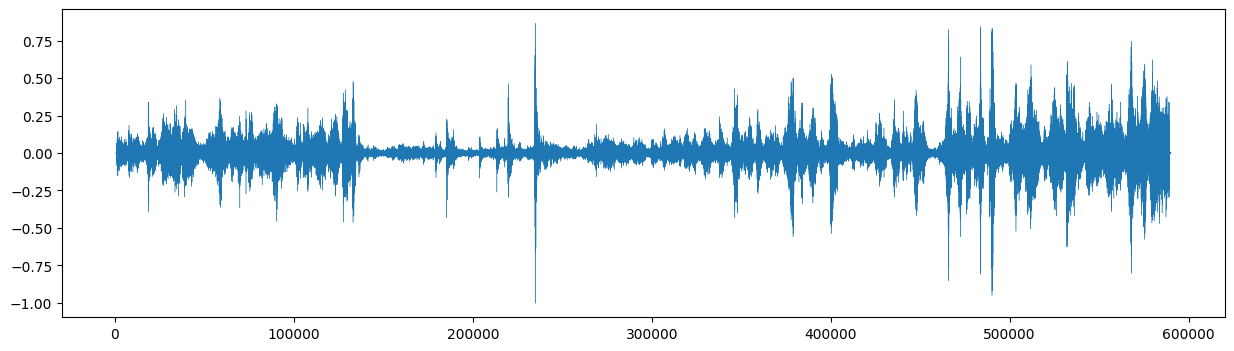

In [21]:
#Applying panda series to plot and get an idea of the audio
pd.Series(y).plot(figsize=(15,4),lw=0.3)
plt.show()

In [22]:
#Trimming the audio, using Librosa in-built function
y_trim,zz=librosa.effects.trim(y,top_db=10)

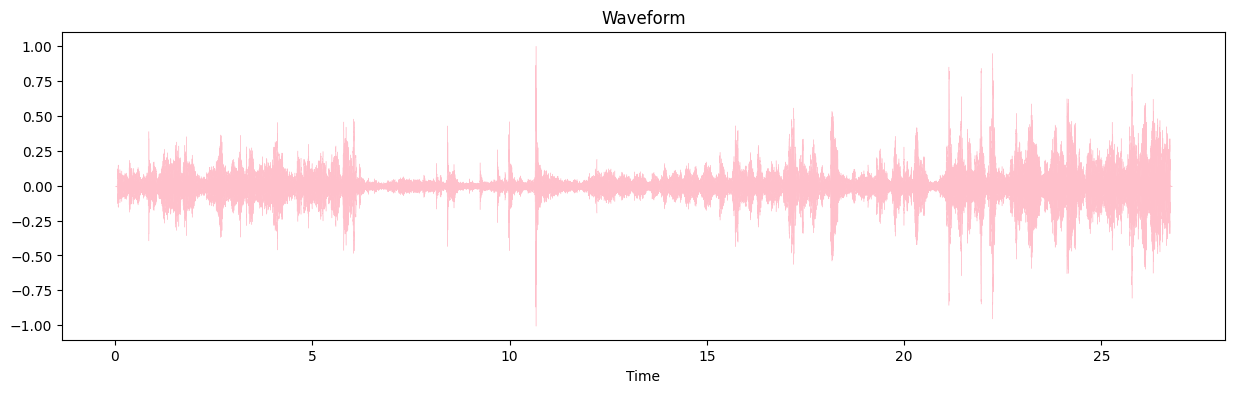

In [23]:
#Plotting the waveform
fig,ax=plt.subplots(figsize=(15,4))
img=librosa.display.waveshow(y,sr=sr,ax=ax,color='pink',lw=0.3)
ax.set_title("Waveform")
ax.label_outer()
plt.show()

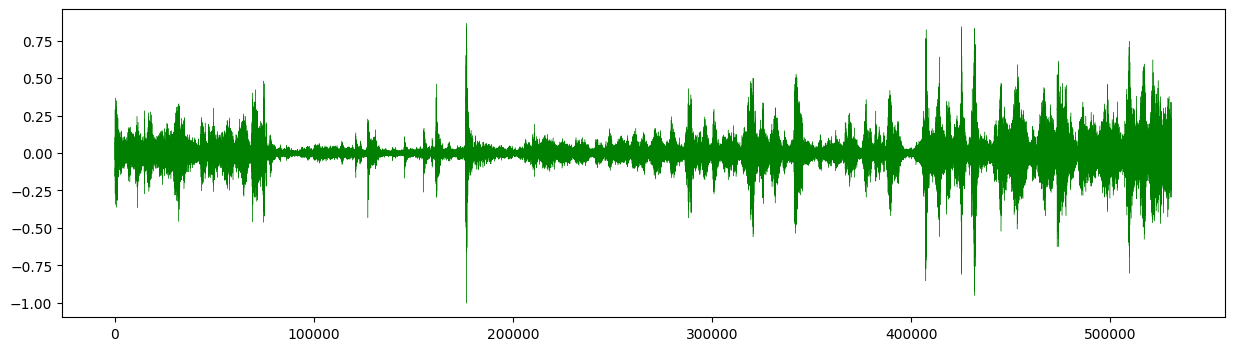

In [24]:
pd.Series(y_trim).plot(figsize=(15,4),lw=0.3,color="green")
plt.show()

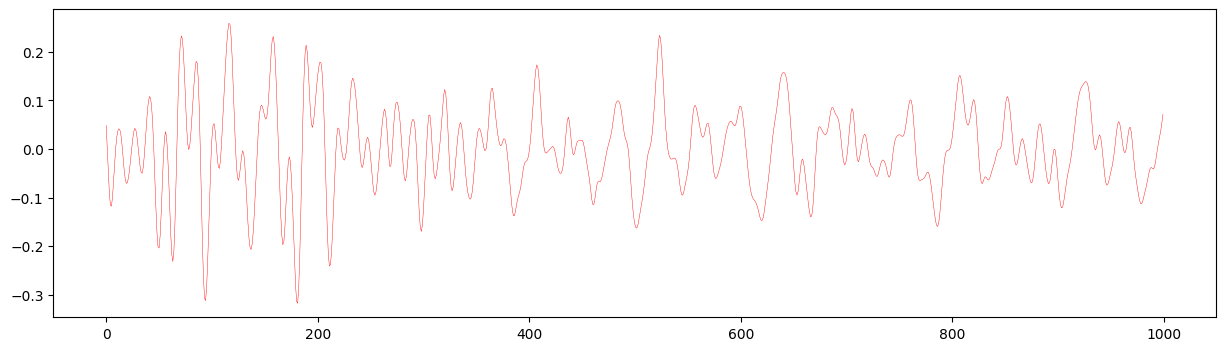

In [25]:
#Using pandas trimmed the audio to a desired level to get an idea for a specific spectrum
pd.Series(y_trim[1000:2000]).plot(figsize=(15,4),lw=0.3,color="red")
plt.show()

In [26]:
#Applying Fourier transform
d_ft = librosa.stft(y)

In [27]:
#Converting the trasnformed wave from amplitude to db
s_db=librosa.amplitude_to_db(np.abs(d_ft))

In [28]:

s_db.shape

(1025, 1154)

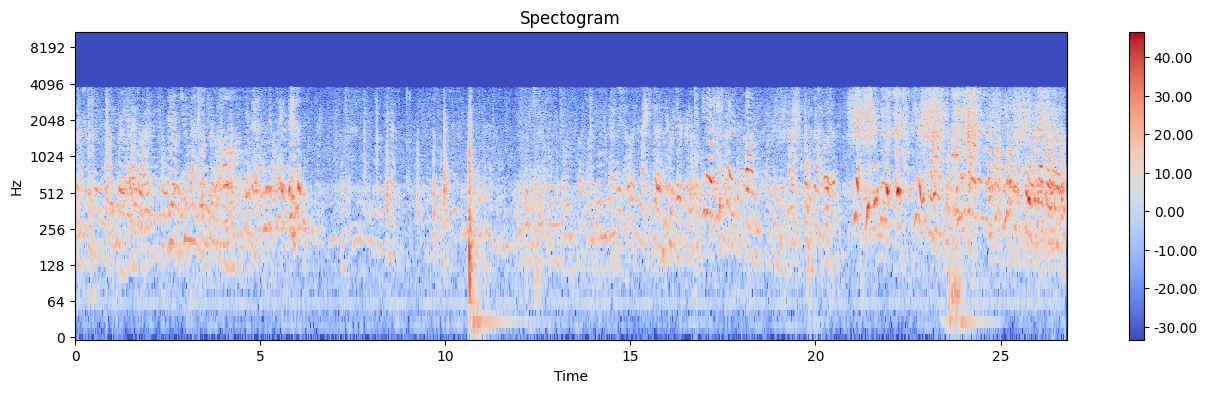

In [29]:
#Generating the spectrogram for the example to get an idea for the audio signal
fig,ax=plt.subplots(figsize=(16,4))
img=librosa.display.specshow(s_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title("Spectogram")
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [30]:
#Generating the mel-spectrogram
s_mel=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=512)
s_db_mel=librosa.amplitude_to_db(np.abs(s_mel))


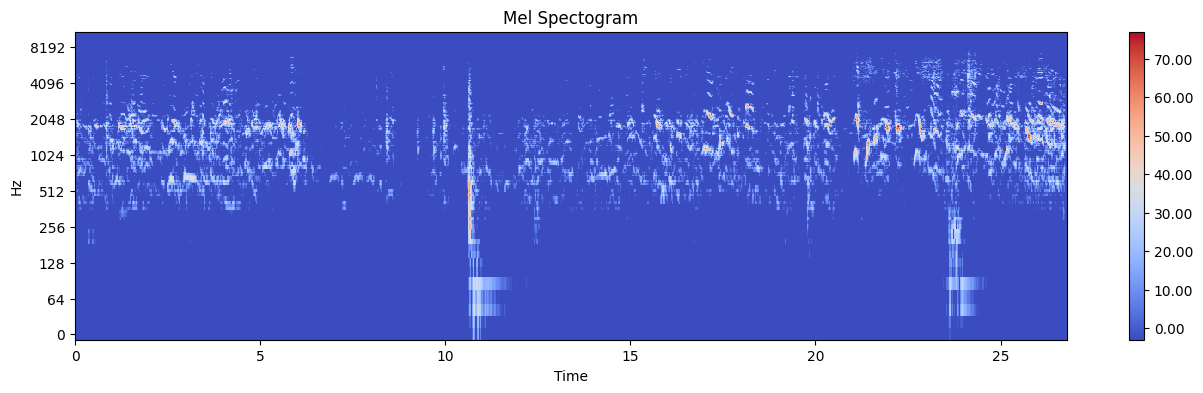

In [31]:
#Generate the Mel-Spectrogram
fig,ax=plt.subplots(figsize=(16,4))
img=librosa.display.specshow(s_db_mel,x_axis='time',y_axis='log',ax=ax)
ax.set_title("Mel Spectogram")
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [32]:
#Mel
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfcc

array([[-509.9963   , -375.55807  , -264.12915  , ..., -202.18848  ,
        -256.20358  , -457.68616  ],
       [   0.       ,  117.92613  ,  172.35802  , ...,  218.29443  ,
         184.03656  ,   55.689934 ],
       [   0.       ,   11.447884 ,  -27.329319 , ...,  -36.05963  ,
         -23.314505 ,   21.680016 ],
       ...,
       [   0.       ,   17.136    ,   10.654335 , ...,    4.81766  ,
           3.0843582,    1.2244498],
       [   0.       ,   -2.644268 ,   -8.959815 , ...,   -9.202482 ,
          -9.513485 ,   -8.540852 ],
       [   0.       ,  -19.929478 ,   -5.149105 , ...,   -1.6021252,
          -7.7148604,  -13.558909 ]], dtype=float32)

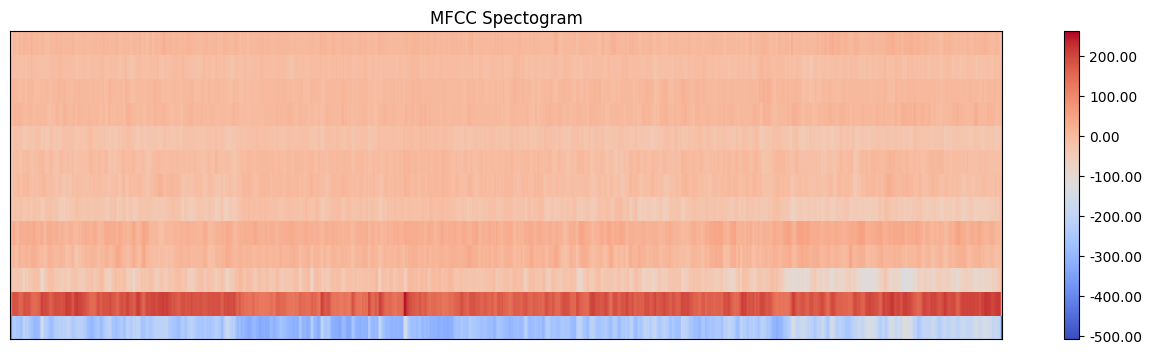

In [33]:
fig,ax=plt.subplots(figsize=(16,4))
img=librosa.display.specshow(mfcc,ax=ax)
ax.set_title("MFCC Spectogram")
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [34]:
mfcc_delta = librosa.feature.delta(mfcc)
mfcc_delta

array([[ 23.967302  ,  23.967302  ,  23.967302  , ..., -22.272879  ,
        -22.272879  , -22.272879  ],
       [ 15.763919  ,  15.763919  ,  15.763919  , ..., -11.269359  ,
        -11.269359  , -11.269359  ],
       [ -4.410791  ,  -4.410791  ,  -4.410791  , ...,   8.479777  ,
          8.479777  ,   8.479777  ],
       ...,
       [ -0.47427586,  -0.47427586,  -0.47427586, ...,  -0.70081   ,
         -0.70081   ,  -0.70081   ],
       [ -1.5477818 ,  -1.5477818 ,  -1.5477818 , ...,  -0.07138004,
         -0.07138004,  -0.07138004],
       [  0.6313388 ,   0.6313388 ,   0.6313388 , ...,  -2.4525473 ,
         -2.4525473 ,  -2.4525473 ]], dtype=float32)

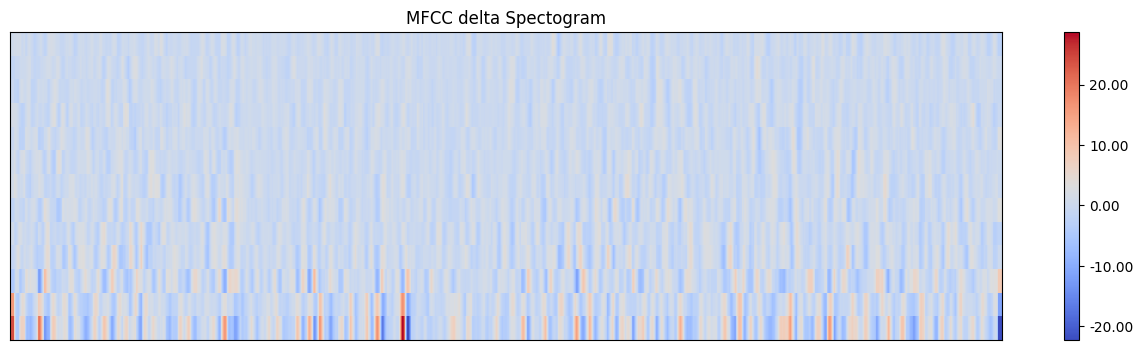

In [35]:
fig,ax=plt.subplots(figsize=(16,4))
img=librosa.display.specshow(mfcc_delta,ax=ax)
ax.set_title("MFCC delta Spectogram")
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [36]:
#harmonic and percussive components.
y_harmonic, y_percussive = librosa.effects.hpss(y)

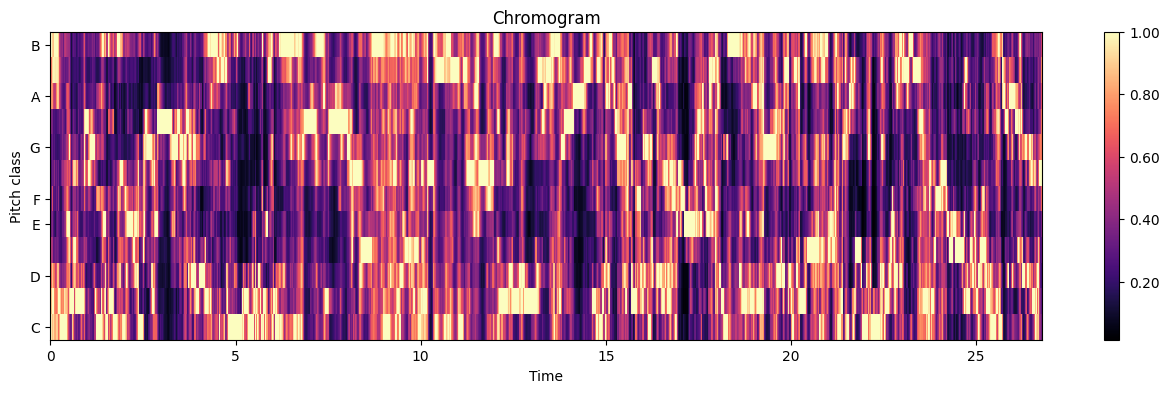

In [37]:
#Chromogram
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
fig,ax=plt.subplots(figsize=(16,4))
img=librosa.display.specshow(chromagram,x_axis="time",y_axis='chroma')
ax.set_title("Chromogram")
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

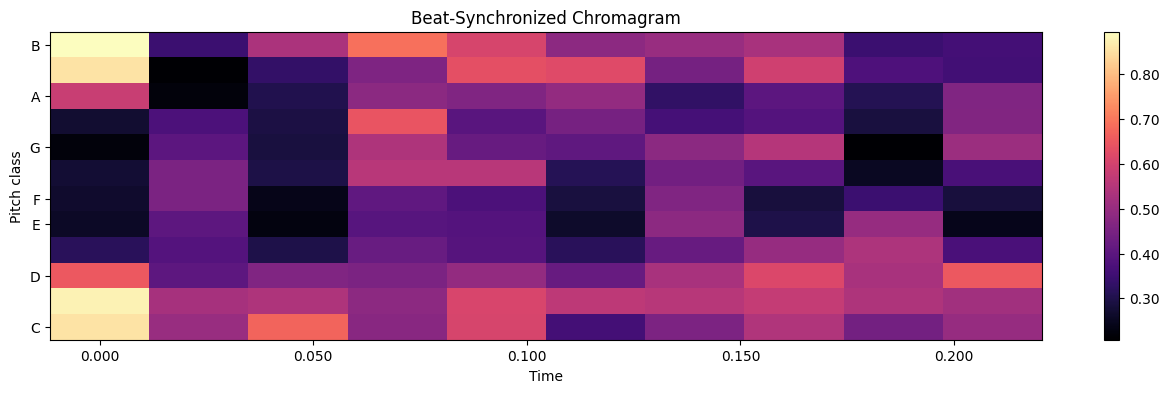

In [38]:
#Synchronize beats
_,beat_frames = librosa.beat.beat_track(y=y, sr=sr, hop_length=hop_length)
beat_chroma = librosa.util.sync(chromagram, beat_frames, aggregate=np.median)
fig,ax=plt.subplots(figsize=(16,4))
img=librosa.display.specshow(beat_chroma,x_axis="time",y_axis='chroma')
ax.set_title("Beat-Synchronized Chromagram")
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [39]:
speech_file=os.path.join(speech_dir+ 'speech-us-gov-0005.wav')
music_file=os.path.join(music_dir+ 'music-fma-wa-0000.wav')

In [40]:
file_contents=tf.io.read_file(speech_file)
#file_contents

In [41]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
len(wav)

428544

In [42]:
def extract_features(filename):
    y1,sr1=librosa.load(filename)
    mfcc_features=librosa.feature.mfcc(y=y1,sr=sr1,n_mfcc=512)
    mfcc_scaled=np.mean(mfcc_features.T,axis=0)
    return mfcc_scaled


In [43]:
def load_wav_16k_mono(filename):

    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav


In [44]:
speech_wave=load_wav_16k_mono(speech_file)

In [45]:
music_wave=load_wav_16k_mono(music_file)

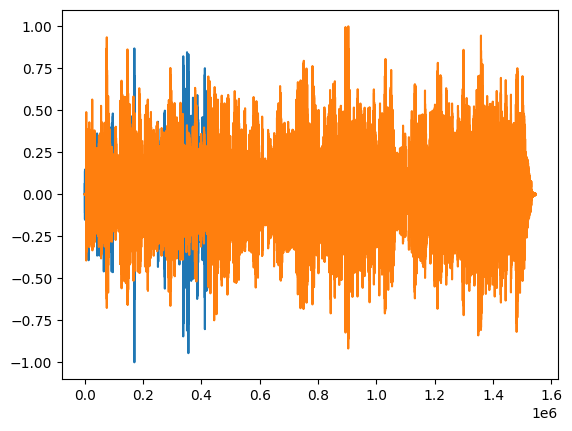

In [46]:
plt.plot(speech_wave)
plt.plot(music_wave)
plt.show()

In [47]:
os.listdir('/content/speech')

['speech-us-gov-0109.wav',
 'speech-us-gov-0250.wav',
 'speech-us-gov-0201.wav',
 'speech-us-gov-0082.wav',
 'speech-us-gov-0229.wav',
 'speech-us-gov-0067.wav',
 'speech-us-gov-0210.wav',
 'speech-us-gov-0130.wav',
 'speech-us-gov-0147.wav',
 'speech-us-gov-0005.wav',
 'speech-us-gov-0252.wav',
 'speech-us-gov-0159.wav']

In [48]:
POS1=os.path.join('/content', 'speech')

In [49]:
NEG1=os.path.join('/content', 'music')

In [50]:
os.listdir(POS1)

['speech-us-gov-0109.wav',
 'speech-us-gov-0250.wav',
 'speech-us-gov-0201.wav',
 'speech-us-gov-0082.wav',
 'speech-us-gov-0229.wav',
 'speech-us-gov-0067.wav',
 'speech-us-gov-0210.wav',
 'speech-us-gov-0130.wav',
 'speech-us-gov-0147.wav',
 'speech-us-gov-0005.wav',
 'speech-us-gov-0252.wav',
 'speech-us-gov-0159.wav']

In [51]:
pos = tf.data.Dataset.list_files('/content/speech/*.wav')

In [52]:
neg = tf.data.Dataset.list_files('/content/music/*.wav')

In [53]:
pos.as_numpy_iterator().next()

b'/content/speech/speech-us-gov-0082.wav'

In [54]:
speech_positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
speech_negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = speech_positives.concatenate(speech_negatives)

In [55]:
speech_positives.as_numpy_iterator().next()

(b'/content/speech/speech-us-gov-0005.wav', 1.0)

In [56]:
speech_negatives.as_numpy_iterator().next()

(b'/content/music/music-fma-wa-0000.wav', 0.0)

In [57]:
data.as_numpy_iterator().next()

(b'/content/speech/speech-us-gov-0005.wav', 1.0)

In [58]:
data.shuffle(10).as_numpy_iterator().next()

(b'/content/speech/speech-us-gov-0005.wav', 1.0)

In [59]:
data.as_numpy_iterator().next()

(b'/content/speech/speech-us-gov-0130.wav', 1.0)

In [60]:
speech_file_lengths = []
for file in os.listdir(os.path.join('/content', 'speech')):
    tensor_wave = load_wav_16k_mono(os.path.join('/content', 'speech',file))
    speech_file_lengths.append(len(tensor_wave))

In [61]:
os.listdir(os.path.join('/content', 'speech'))

['speech-us-gov-0109.wav',
 'speech-us-gov-0250.wav',
 'speech-us-gov-0201.wav',
 'speech-us-gov-0082.wav',
 'speech-us-gov-0229.wav',
 'speech-us-gov-0067.wav',
 'speech-us-gov-0210.wav',
 'speech-us-gov-0130.wav',
 'speech-us-gov-0147.wav',
 'speech-us-gov-0005.wav',
 'speech-us-gov-0252.wav',
 'speech-us-gov-0159.wav']

In [62]:
speech_file_lengths

[314724,
 2017906,
 928288,
 3439386,
 1607456,
 2524056,
 1981544,
 852636,
 3454014,
 428544,
 3704784,
 2782354]

In [63]:
music_file_lengths = []
for file in os.listdir(os.path.join('/content', 'music')):
    tensor_wave = load_wav_16k_mono(os.path.join('/content', 'music',file))
    music_file_lengths.append(len(tensor_wave))

In [64]:
music_file_lengths

[931200,
 1359744,
 1555644,
 1589917,
 1546031,
 684288,
 1376758,
 1182407,
 1281024,
 1018752,
 944170,
 1602816]

In [65]:
tf.math.reduce_mean(speech_file_lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=2002974>

In [66]:
tf.math.reduce_min(speech_file_lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=314724>

In [67]:
tf.math.reduce_max(speech_file_lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=3704784>

In [68]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=640, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [69]:
filepath, label = speech_positives.shuffle(buffer_size=10).as_numpy_iterator().next()
filepath, label = speech_positives.as_numpy_iterator().next()

In [70]:
filepath

b'/content/speech/speech-us-gov-0229.wav'

In [71]:
spectrogram, label = preprocess(filepath, label)

In [72]:
tf.transpose(spectrogram)[0]

<tf.Tensor: shape=(513, 1481), dtype=float32, numpy=
array([[3.0933259e-04, 7.3498581e-05, 2.7803890e-04, ..., 3.6498268e+00,
        3.7136786e+00, 3.7088490e+00],
       [4.3561583e-04, 3.9370405e-04, 4.7937667e-04, ..., 2.9388833e+00,
        2.9457979e+00, 2.9237452e+00],
       [5.1325950e-04, 8.4009924e-04, 7.8522938e-04, ..., 1.4723222e+00,
        1.3049629e+00, 1.1892304e+00],
       ...,
       [3.5490464e-06, 3.2551784e-06, 1.0581635e-06, ..., 4.2265747e-06,
        1.3234379e-06, 3.3378601e-06],
       [3.6762078e-06, 1.7269660e-06, 1.9845954e-06, ..., 4.8276083e-06,
        1.9221920e-06, 4.8217171e-06],
       [4.0006998e-06, 3.9543957e-06, 1.9054860e-06, ..., 4.0531158e-06,
        3.0994415e-06, 4.1723251e-06]], dtype=float32)>

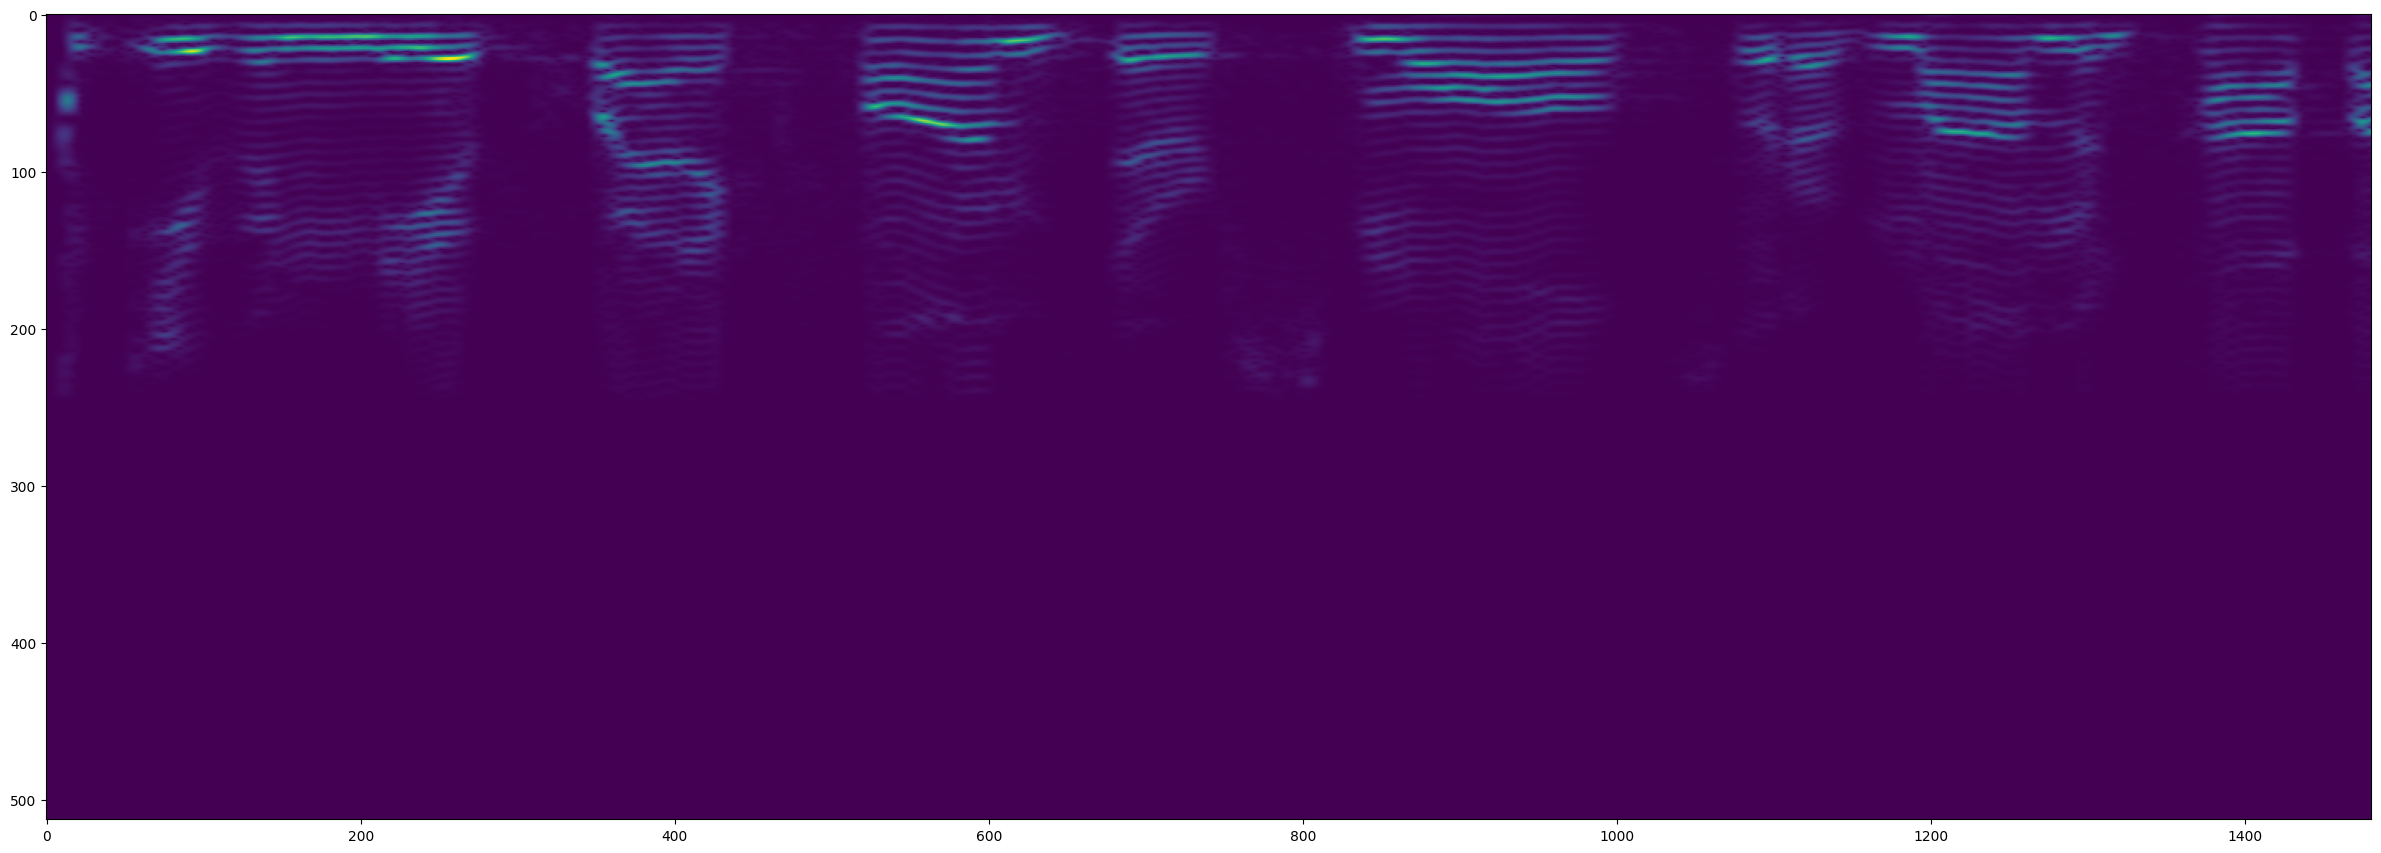

In [73]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [74]:
filepath1, label1 = speech_negatives.as_numpy_iterator().next()

In [75]:
spectrogram1, label1 = preprocess(filepath1, label1)

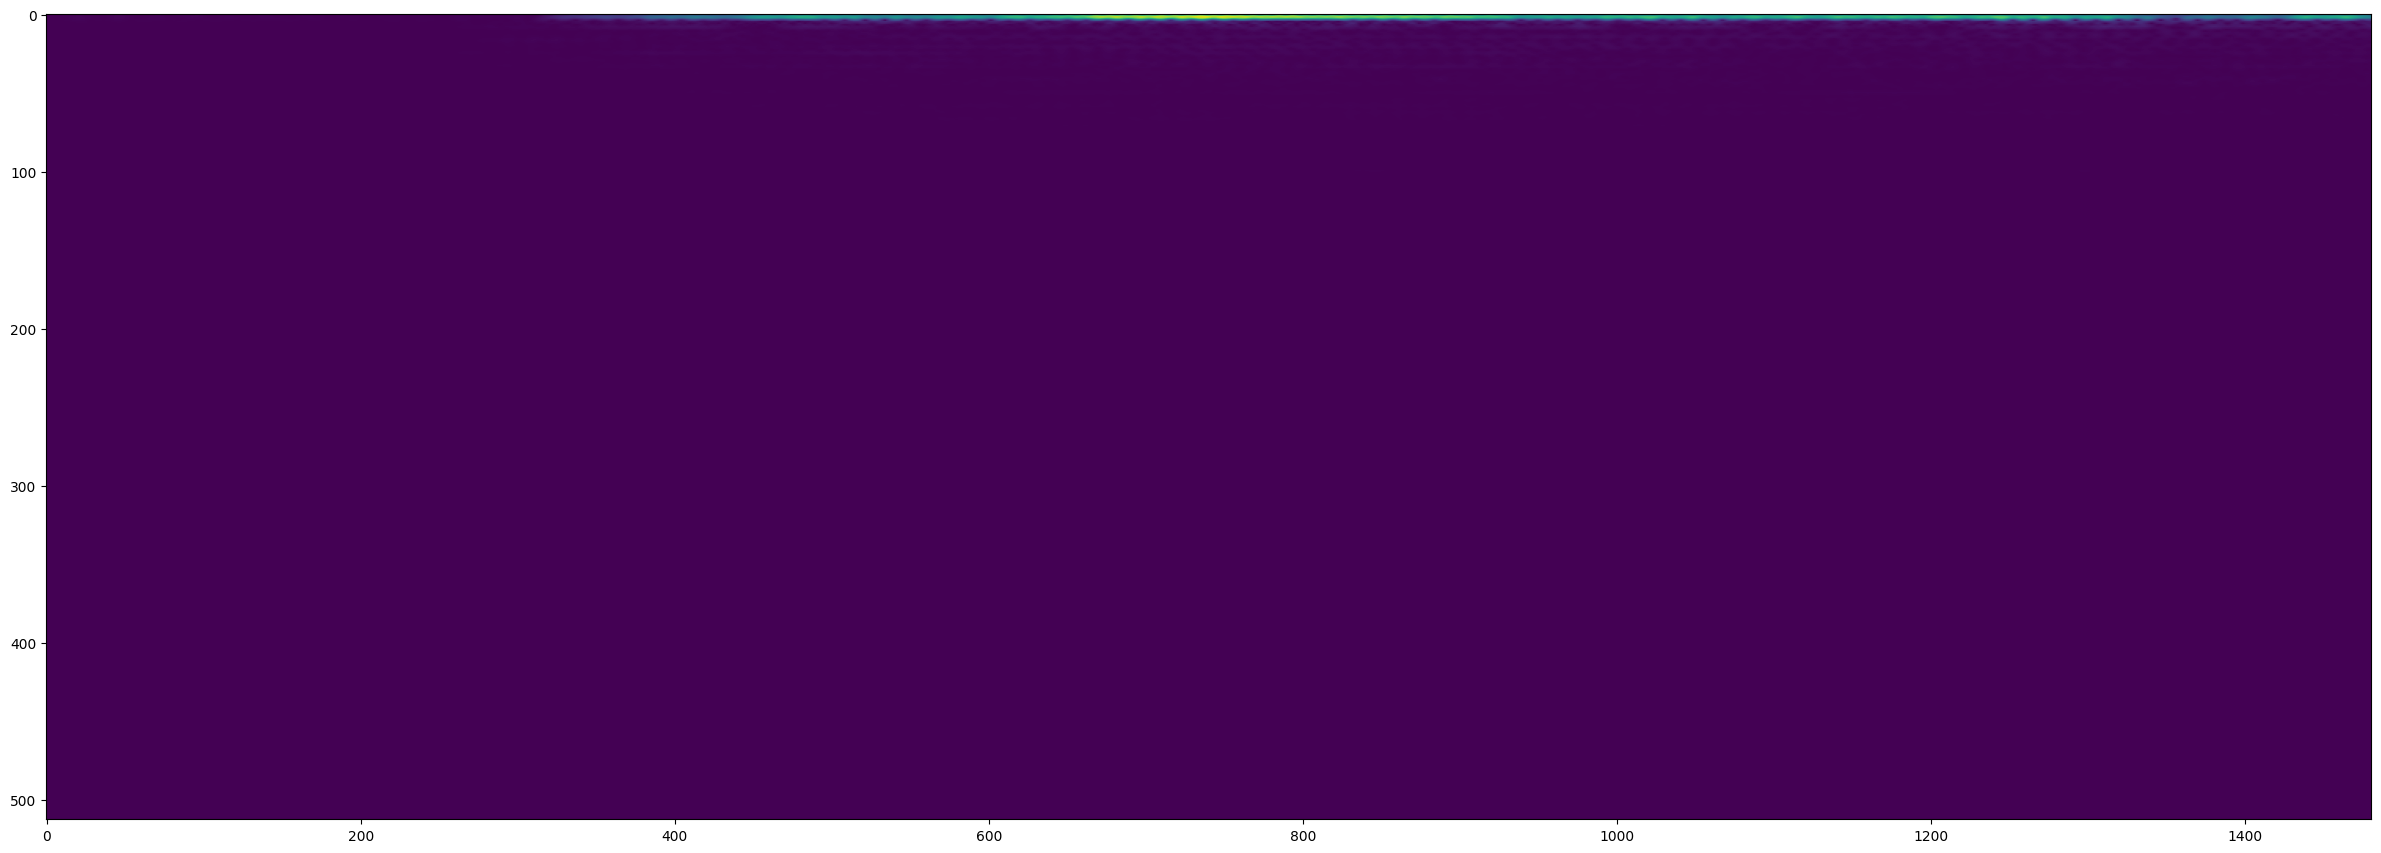

In [76]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram1)[0])
plt.show()


In [77]:
data = data.map(preprocess)
#data = data.cache()
data = data.shuffle(buffer_size=1)
data = data.batch(1)
data = data.prefetch(1)


In [80]:
train = data.take(5)
test = data.skip(5).take(3)

In [81]:
samples, labels = train.as_numpy_iterator().next()


In [82]:
samples.shape

(1, 1481, 513, 1)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten


In [91]:
model = Sequential()
model.add(Conv2D(4, (3,3), activation='relu', input_shape=(1481, 513,1)))
model.add(Conv2D(4, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [92]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [93]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1479, 511, 4)      40        
                                                                 
 conv2d_3 (Conv2D)           (None, 1477, 509, 4)      148       
                                                                 
 flatten_1 (Flatten)         (None, 3007172)           0         
                                                                 
 dense_2 (Dense)             (None, 32)                96229536  
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 96229757 (367.09 MB)
Trainable params: 96229757 (367.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
hist = model.fit(train, epochs=2, validation_data=test)

Epoch 1/2
5/5 [==============================] - 3s 292ms/step - loss: 0.1286 - recall_1: 1.0000 - precision_1: 1.0000 - val_loss: 0.0000e+00 - val_recall_1: 1.0000 - val_precision_1: 1.0000
Epoch 2/2
5/5 [==============================] - 2s 352ms/step - loss: 0.0000e+00 - recall_1: 1.0000 - precision_1: 1.0000 - val_loss: 0.0000e+00 - val_recall_1: 1.0000 - val_precision_1: 1.0000


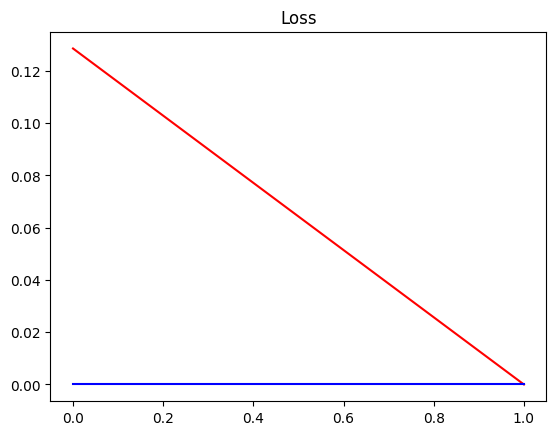

In [95]:

plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()


KeyError: 'precision'

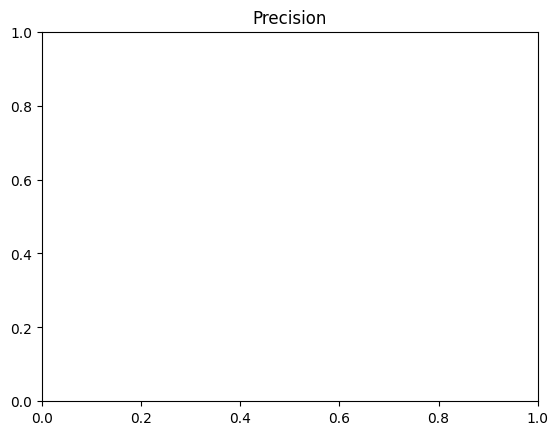

In [97]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

KeyError: 'recall'

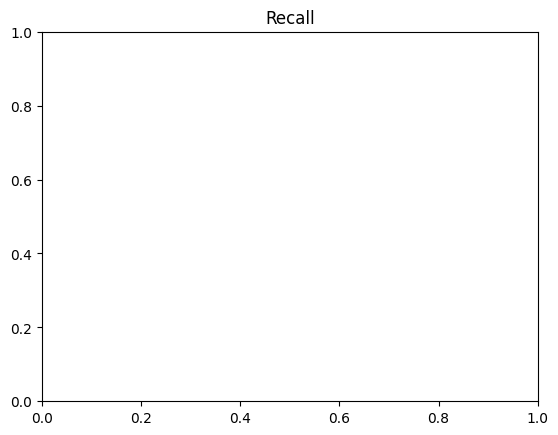

In [98]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()


In [99]:
X_test, y_test = test.as_numpy_iterator().next()

In [100]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 84ms/step


In [101]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [102]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [103]:
samples, index = audio_slices.as_numpy_iterator().next()

TypeError: in user code:

    File "<ipython-input-68-b12e06c4d7c6>", line 2, in preprocess  *
        wav = load_wav_16k_mono(file_path)
    File "<ipython-input-43-d0cc134434d3>", line 3, in load_wav_16k_mono  *
        file_contents = tf.io.read_file(filename)

    TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'conv2d_2' (type Conv2D).
    
    Negative dimension size caused by subtracting 3 from 1 for '{{node sequential_1/conv2d_2/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_1/ExpandDims, sequential_1/conv2d_2/Conv2D/ReadVariableOp)' with input shapes: [?,?,1,1], [3,3,1,4].
    
    Call arguments received by layer 'conv2d_2' (type Conv2D):
      • inputs=tf.Tensor(shape=(None, None, 1, 1), dtype=float32)


In [106]:
from itertools import groupby

In [112]:
results = {}
for file in os.listdir(os.path.join('/contents', 'Final file for identifying')):
    FILEPATH = os.path.join('data','Final file for identifying', file)

    wav = load_wav_22k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess)
    audio_slices = audio_slices.batch(1)

    yhat = model.predict(audio_slices)

    results[file] = yhat



FileNotFoundError: [Errno 2] No such file or directory: '/contents/Final file for identifying'